# Modelos analiticos para DS

## REPASO
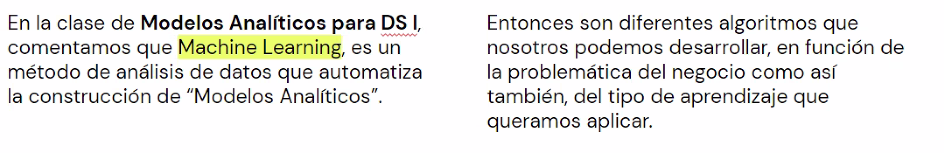

# APRENDIZAJE SUPERVISADO
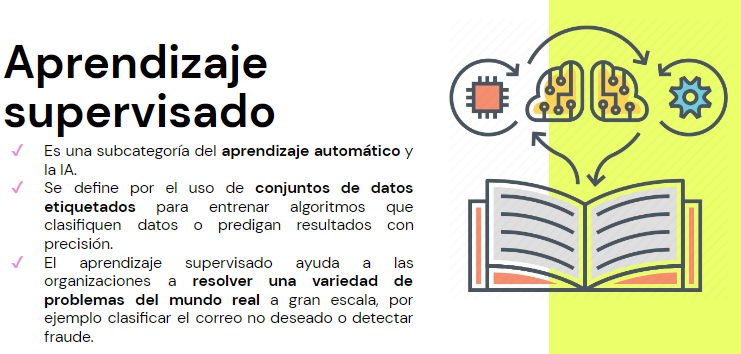

## Tipos problemas
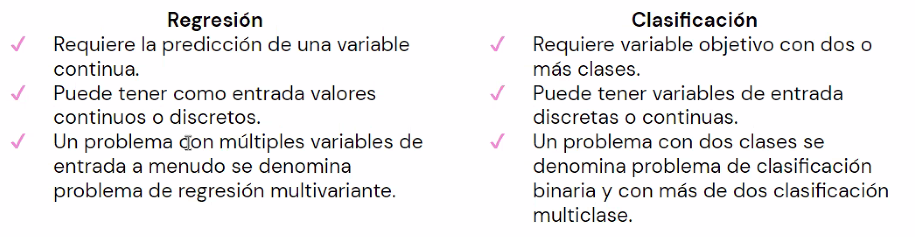
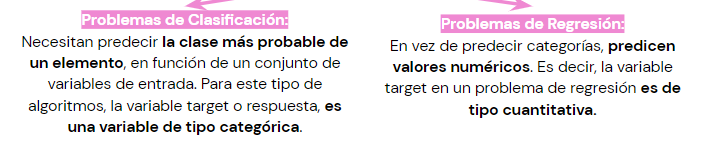

In [31]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets, tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
mpl.style.use('bmh')

### CLASIFICACION

Reconocen entidades específicas dentro del conjunto de datos e intenta obtener conclusiones sobre cómo esas entidades deben etiquetarse o definirse. 

Los algoritmos de clasificación comunes son clasificadores lineales, máquinas de vectores de soporte (SVM), árboles de decisión, k-nearest Neighbor y Random Forest

Tenemos dos grandes tipos: **problemas de clasificación binaria y multiclase**

* **Clasificación binaria**: Clasifica los datos en dos clases, como Si/No, bueno/malo, alto/bajo, padece una enfermedad en particular o no, etc.
* **Clasificación multiclase**: Clasifica datos en tres o más clases; por ej. clasificación de documentos, categorización de productos, clasificación de malware

### Tipos de algoritmos de clasificación

#### Arboles de decisión
* Son estructuras matemáticas (diagramas de flujo) que utilizan criterios de teoría de la información como la impureza (Gini, entropía) para hacer segmentaciones
* El aprendizaje basado en árboles de decisión está ampliamente extendido en la actualidad, y múltiples modelos hacen diferentes implementaciones de los mismos. 
* Las primeras versiones de estos modelos fueron implementados por Leo Breiman. 
* Se utilizan para problemas de Clasificación y Regresión.
* Aprenden de los datos generando reglas de tipo if-else. 
* Separan los datos en grupos cada vez más pequeños de subsets de un dataset original. 
* A cada división se la conoce con el nombre de nodo. Cuando un nodo no conduce a nuevas divisiones se le denomina hoja, para luego ser considerada como ramas del árbol. 

##### Ventajas
* Caja blanca (conjunto de reglas con booleanos), sus resultados son fáciles de entender e interpretar.
* Relativamente robusto cuando la complejidad no es tan alta.
* Funcionan relativamente bien con grandes conjuntos de datos.
* Combinaciones de los mismos pueden dar resultados muy certeros sin perder explicabilidad, por ejemplo, Random Forest.

##### Desventajas
* Tienden al sobreajuste u overfitting de los datos, por lo que el modelo al predecir nuevos casos no estima con el mismo índice de acierto.
* Se ven influenciadas por los outliers, creando árboles con ramas muy profundas que no predicen bien para nuevos casos. 
* Crear árboles demasiado complejos puede conllevar que no se adapten bien a los nuevos datos.
* Se pueden crear árboles sesgados si una de las clases es más numerosa que otra es decir, si hay desbalance de clases.

##### EJEMPLO

In [3]:
# Conjunto de datos de plantas
iris = datasets.load_iris()

In [5]:
# Descripción por clave
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
# Lo vemos en dataset
df = pd.DataFrame(x, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
x = iris.data
y = iris.target

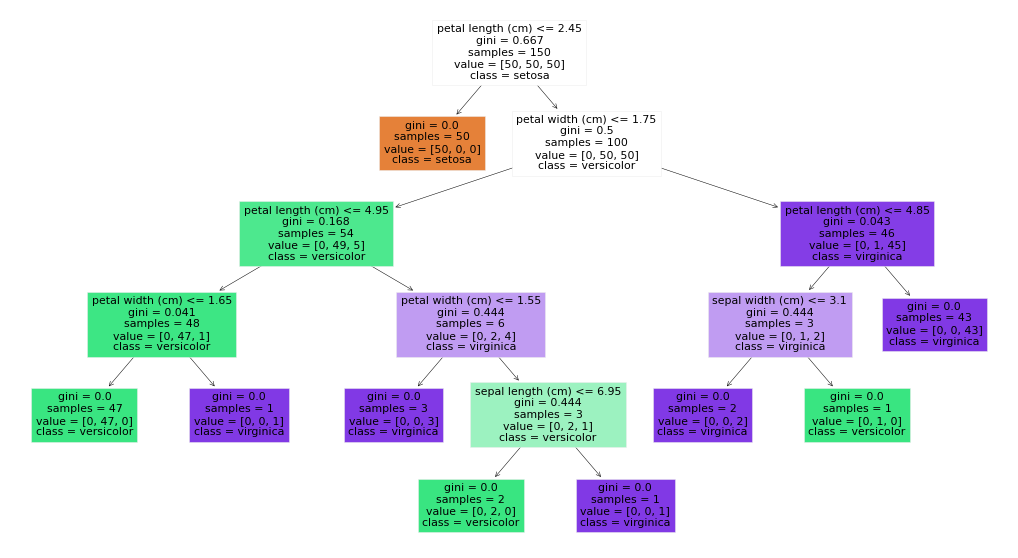

In [11]:
# Algoritmo de clasificacion: arboles de decision
clf = DecisionTreeClassifier(random_state=1234)  # utiliza el criterio gini para cambiar criterion='entropy'
model = clf.fit(x, y)

# Grafico
fig = plt.figure(figsize=(18, 10))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

#### KNN: K-Nearest-Neighbor (Vecinos cercanos)
Puede usarse para clasificar nuevas muestras (valores discretos) o para predecir (regresión, valores continuos). 
Sirve esencialmente para clasificar valores, buscando los puntos de datos “más similares” (por cercanía).

##### Consideraciones
1. En todos los casos vemos que si elegimos k=1 se tiene un modelo con overfit.
2. Cuando el valor es muy grande de k (e.g 60) tenemos un modelo con underfit excepto cuando tenemos outliers y en formas como XOR no lineales
3. Cada dataset tiene su propio requerimiento para el valor de k 
4. Valores altos de k pueden llevar a alto costo computacional
5. Cuando k es pequeño tenemos bajo sesgo pero alta varianza. Valores altos de k generan menor varianza pero mayor sesgo

##### EJEMPLO

In [16]:
from sklearn import neighbors
from mlxtend.plotting import plot_decision_regions

In [18]:
data1 = pd.read_csv('../datasets/clase8/ushape.csv')
data1.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


In [17]:
def knn_comparision(data, k):
    x = data[['X', 'Y']].values
    y = data['class'].astype(int).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
    plot_decision_regions(x, y, clf=clf, legend=2)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('KNN with k=' + str(k))
    plt.show()

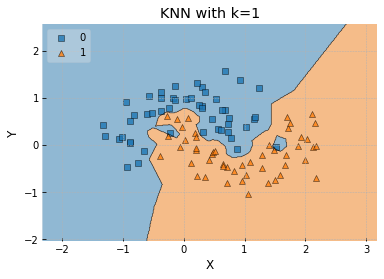

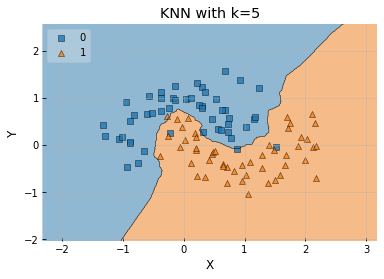

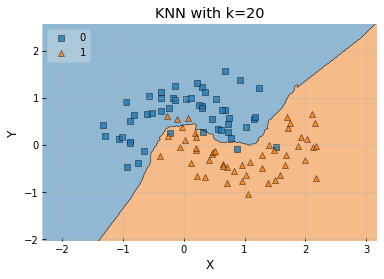

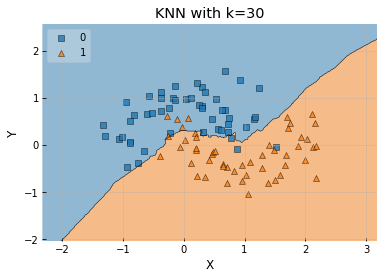

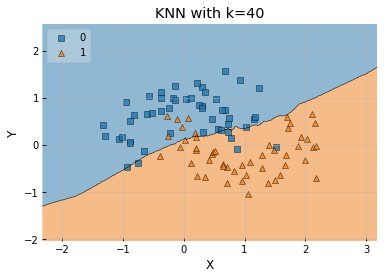

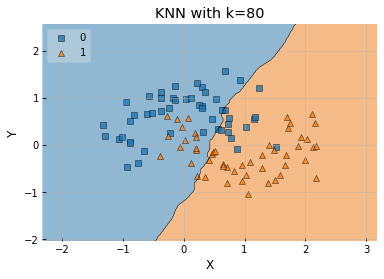

In [19]:
for i in [1,5,20,30,40,80]:
    knn_comparision(data1, i)

NOTA: Mientra más aumenta el valor de k, aumenta el error de clasificación.

Entonces, para conocer el valor de k podemos manejar el error.

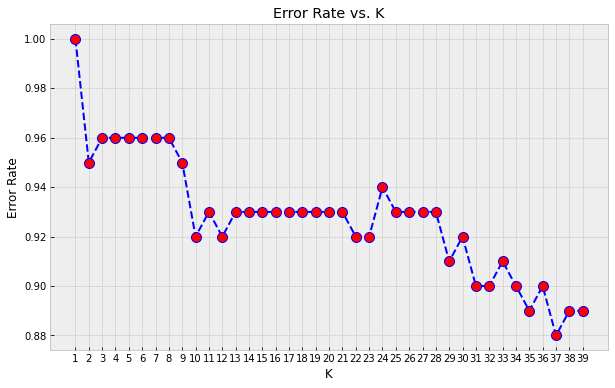

In [20]:
# Algoritmo para ver los valores de error o score
x = data1[['X','Y']].values
y = data1['class'].astype(int).values
error_rate = []
for i in range(1,40):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i) #algoritmo
  knn.fit(x, y)
  pred_i = knn.predict(x)
  error_rate.append(knn.score(x,y))
  #error_rate.append(np.mean(pred_i != y))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title("Error Rate vs. K")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.xticks(range(1,40))
plt.show()


#### Regresión logística
##### EJEMPLO

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [23]:
X, y = load_breast_cancer(return_X_y=True)

In [24]:
# Dataset: dependiendo de las caracteristicas del tumor, nos dice si es canceroso o no
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
model = LogisticRegression(max_iter=10000, n_jobs=-1)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, n_jobs=-1)

In [29]:
predicciones = model.predict(X_test)
predicciones

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [32]:
cf_matrix = confusion_matrix(y_test, predicciones)

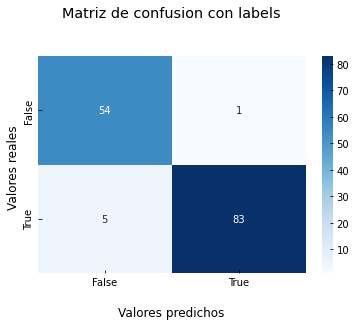

In [33]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

# APRENDIZAJE NO SUPERVISADO

* Es una subcategoría del aprendizaje automático y la IA. 
* Se define por el uso de conjuntos de datos no etiquetados para entrenar algoritmos que encuentren patrones ocultos. 
* El aprendizaje no supervisado ayuda a las organizaciones a resolver una variedad de problemas del mundo real a gran escala, por ejemplo en sistemas de recomendación como Amazon con base en Clustering.

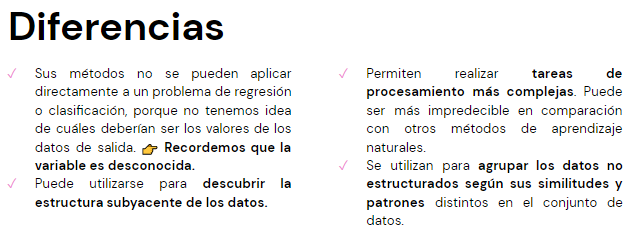

## Tipos de problemas
Los problemas de aprendizaje no supervisado se clasifican principalmente en dos categorías: 
* **Cluster** (donde tenemos algoritmos como k-means. clustering jerárquico, modelos de mixturas gaussianas, o algoritmo basados en densidad como DBSCAN) 
* **Reducción de dimensionalidad** (como PCA, ICA, Análisis Factorial)

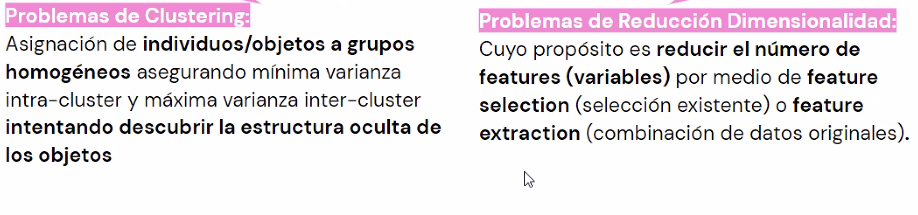
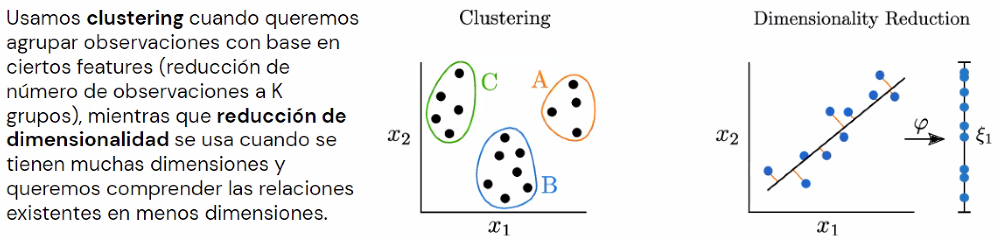


### CLUSTERING
También conocidas como agrupamiento o segmentación tienen como principal función encontrar una estructura o un patrón en una colección de datos no clasificados. 🎯

**Tipos de algoritmos de clustering**
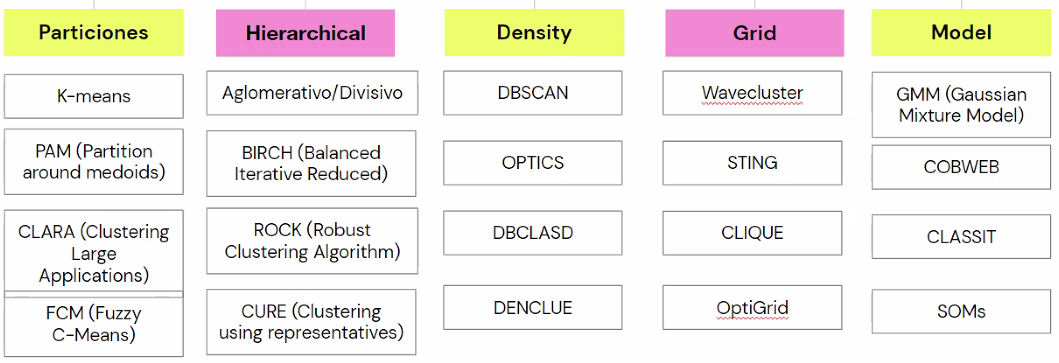

#### Clustering jerárquico
En estos algoritmos se generan sucesiones ordenadas (jerarquías) de conglomerados. Puede ser agrupando clústers pequeños en uno más grande o dividiendo grandes clusters en otros más pequeños. 
La estructura jerárquica es representada en forma de un árbol llamado Dendograma.

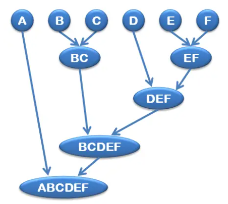
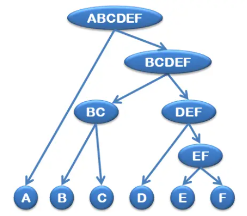

##### EJEMPLO


In [34]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [35]:
data = pd.read_csv('../datasets/clase8/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
X = data.iloc[:, [3, 4]].values

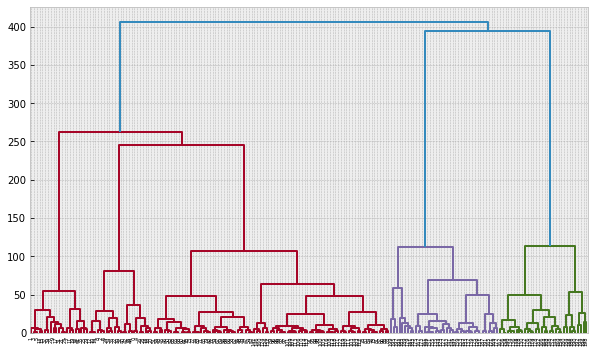

In [37]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

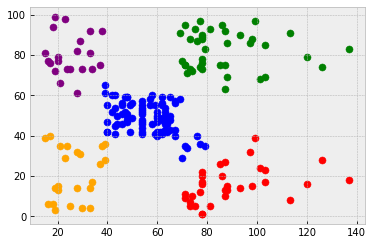

In [38]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X)

labels = model.labels_

plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

#### Cluster no jerárquico
Volviendo a este tipo de algoritmo, la cantidad de clústeres óptima se define de antemano, y los registros se asignan a los clústeres según su cercanía. Existen múltiples algoritmos de Tipo No Jerárquico, como ser por ejemplo: **K – Means o DBSCAN**.

##### EJEMPLO K-Means

In [39]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [40]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [41]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

pred_y = kmeans.fit_predict(X)
pred_y

array([0, 2, 1, 2, 0, 0, 3, 1, 2, 2, 3, 2, 1, 2, 0, 1, 1, 0, 3, 3, 0, 0,
       1, 3, 3, 1, 0, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 3, 0, 1, 3, 1, 1,
       3, 3, 2, 3, 2, 0, 3, 0, 2, 0, 0, 3, 2, 3, 2, 0, 2, 1, 2, 3, 3, 3,
       2, 0, 2, 3, 1, 3, 2, 3, 3, 2, 3, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 1, 0, 2, 3, 3, 1, 0, 0, 1, 3, 2, 0, 2, 0, 1, 0, 0, 1, 2, 1,
       3, 3, 0, 2, 0, 1, 2, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 2, 3,
       3, 0, 2, 3, 3, 2, 1, 2, 2, 3, 1, 3, 1, 3, 2, 1, 2, 2, 2, 1, 2, 1,
       0, 3, 2, 3, 0, 1, 2, 1, 1, 0, 1, 3, 3, 1, 0, 1, 1, 2, 0, 1, 3, 2,
       0, 0, 1, 3, 0, 1, 3, 3, 1, 1, 1, 1, 0, 2, 1, 3, 1, 1, 3, 3, 3, 1,
       3, 2, 1, 3, 0, 3, 1, 2, 3, 2, 1, 2, 1, 3, 1, 1, 2, 3, 3, 0, 0, 1,
       2, 0, 0, 3, 0, 3, 1, 2, 2, 1, 1, 2, 1, 0, 3, 1, 0, 3, 2, 3, 0, 1,
       0, 2, 2, 2, 2, 3, 3, 2, 1, 3, 0, 1, 3, 3, 3, 0, 0, 2, 1, 1, 3, 0,
       2, 3, 1, 2, 1, 0, 0, 3, 3, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0,
       2, 3, 2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 3])

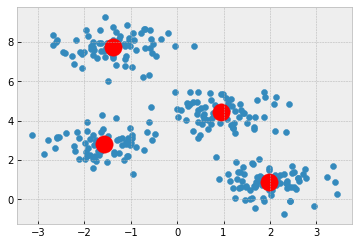

In [44]:
plt.scatter(X[:, 0], X[:, 1])  # nuve de puntos
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')  # centroides
plt.show()

c:\Users\alk10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


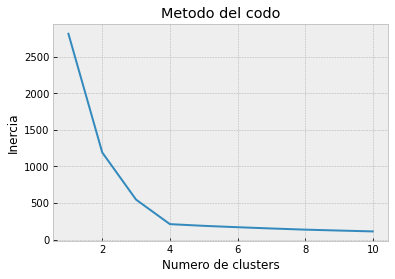

In [45]:
# Algoritmo para saber cuantos clusters usar
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.show()

#### Clustering basado en densidad
Son métodos de aprendizaje no supervisado que identifican grupos/clústeres, basados en la idea de que un clúster es un espacio de datos es una región contigua de alta densidad de puntos, separada de otros clústeres similares por regiones contiguas de baja densidad de puntos

Se tienen en cuenta dos parámetros importantes:
* **eps**: Define la vecindad alrededor de un punto, si la distancia entre dos puntos es menor o igual a "eps", entonces se consideran vecinos. Si el valor de eps se elige demasiado pequeño, gran parte de los datos se considerarán valores atípicos.
* **MinPts**: Número mínimo de vecinos (puntos) dentro del radio eps. MinPts se pueden calcular del número de dimensiones D como MinPts >= D + 1. El valor mínimo de MinPts debe ser de al menos 3.

##### EJEMPLO DBSCAN

In [46]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

#. clusters estimado: 2
# puntos ruidosos: 0


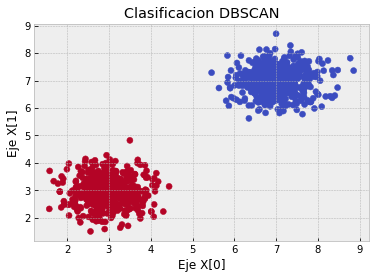

In [47]:
# Configuracion de datos y parametros
num_samples_total = 1000;cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers);epsilon = 1.0;min_samples = 13

# Generacion de datos
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

# DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_;no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0) # Ruido (Outliers)
print('#. clusters estimado: %d' % no_clusters)
print('# puntos ruidosos: %d' % no_noise)

# Generar figura de datos
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Clasificacion DBSCAN'); plt.xlabel('Eje X[0]'); plt.ylabel('Eje X[1]');plt.show()

#### Reducción de la dimensionalidad
Buscamos reducir la cantidad de features de un dataset, pero reteniendo la mayor cantidad de “información” posible. 
Tenemos dos aplicaciones principales con esta técnica
* Eliminar variables
* Encontrar grupos

**Por qué lo aplicamos?**
* Para enfrentar “La Maldición de la Dimensionalidad” es decir, tenemos tantos features que termina siendo algo negativo para nuestro modelo de ML. 
* Reducir el input en un modelo de regresión o clasificación.
* Visualizar mucho mejor nuestros datos. 
* Compresión de archivos.
* Detectar features relevantes en datasets o variables altamente correlacionadas.

##### EJEMPLO PCA

In [48]:
# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import statsmodels.api as sm
import seaborn as sns
sns.set_style("whitegrid")

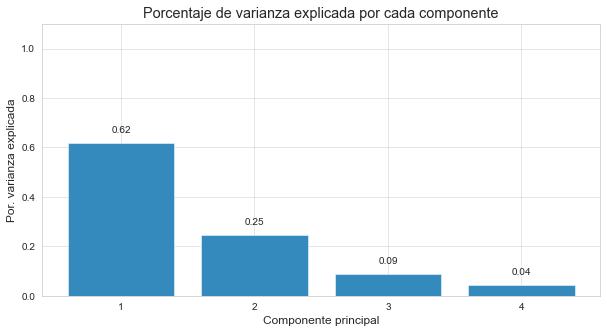

In [49]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data

# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
import seaborn as sns;sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(x= np.arange(modelo_pca.n_components_) + 1,height = modelo_pca.explained_variance_ratio_)
for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
   label = round(y, 2);ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1);ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

Text(0, 0.5, 'PC2')

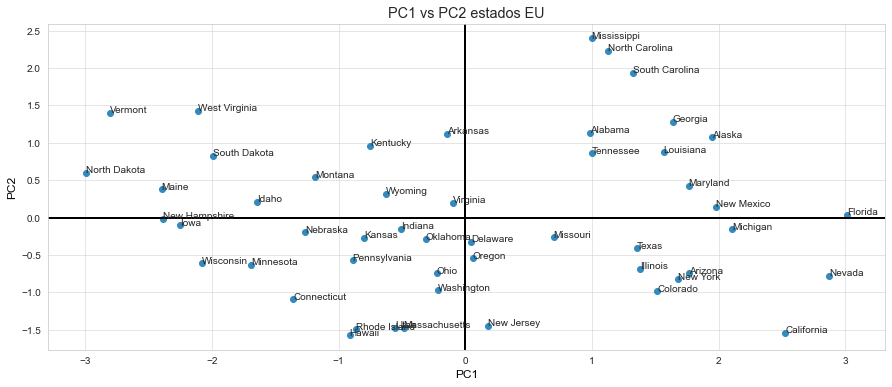

In [50]:
# Proyección de las observaciones de entrenamiento
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(proyecciones,columns = ['PC1', 'PC2', 'PC3', 'PC4'],index= datos.index)
proyecciones = np.dot(modelo_pca.components_, scale(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4'])
proyecciones = proyecciones.transpose().set_index(datos.index)

plt.figure(figsize=(15,6))
proyecciones['val']=proyecciones.index
ax = proyecciones.set_index('PC1')['PC2'].plot(style='o')

def label_point(x, y, val, ax):
 a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
 for i, point in a.iterrows():
   ax.text(point['x'], point['y'], str(point['val']))
label_point(proyecciones.PC1, proyecciones.PC2, proyecciones.val, ax)

plt.axvline(x=0,color='black');plt.axhline(y=0,color='black')
plt.title('PC1 vs PC2 estados EU');plt.xlabel('PC1',color='k')
plt.ylabel('PC2',color='black')

# Actividad para hacer
https://raw.githubusercontent.com/JJTorresDS/stocks-ds-edu/main/stocks.csv